Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [113]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [95]:
def LeerPrecios(filename):
    for indice in range(10):
        DataFrame = pd.read_excel(filename,skiprows = indice ,usecols = list(range(25)))
        if DataFrame.iloc[0,0] == 'Fecha':
            DataFrame = pd.read_excel(filename,skiprows = indice+1, usecols = list(range(25)))
            break
    return DataFrame

In [96]:
Archivos = !ls Files/*.xls*
DataFrames = []
for filename in Archivos:
    DataFrames.append(LeerPrecios(filename))
DataFrames = pd.concat(DataFrames)
DataFrames = pd.melt(DataFrames,id_vars = 'Fecha')
DataFrames.columns = ['Fecha','Hora','Precio']

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [97]:
DataFrames.isnull().sum().sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [98]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = len(DataFrameSinRepetir.drop_duplicates().index)
TotalRepetidos =  len(DataFrames.index) - DataFrameSinRepetir
TotalRepetidos

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [99]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = (DataFrameSinRepetir.drop_duplicates())
DataFrameSinRepetir = DataFrameSinRepetir.dropna()
len(DataFrameSinRepetir.index)

199819

**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 0, 'Dia')

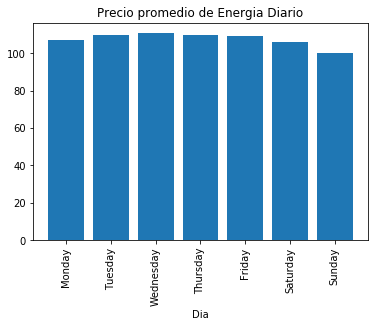

In [160]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DatosPorDia = DatosPorDia.groupby('Dia').agg({'Precio': np.mean}) 
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
DatosPorDia.reset_index(inplace=True)
DatosPorDia['DayRank'] = DatosPorDia['Dia'].map(sorterIndex)
DatosPorDiaOrdenadosPorDia = (DatosPorDia.sort_values('DayRank'))
plt.bar(range(7), DatosPorDiaOrdenadosPorDia['Precio'])
plt.xticks(range(7), list(DatosPorDiaOrdenadosPorDia['Dia']), rotation='vertical')
plt.title('Precio promedio de Energia Diario')
plt.xlabel('Dia')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 0, 'Mes')

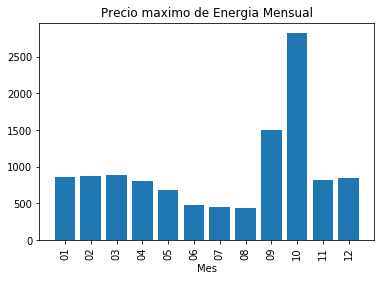

In [177]:
DatosPorMesMaximo = DataFrameSinRepetir.copy()
DatosPorMesMaximo['Fecha'] = pd.to_datetime(DatosPorMesMaximo['Fecha'])
DatosPorMesMaximo['Mes'] =  DatosPorMesMaximo[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesMaximo = DatosPorMesMaximo.groupby('Mes').agg({'Precio': np.max}) 
plt.bar(range(12), DatosPorMesMaximo['Precio'])
plt.xticks(range(12), (list(DatosPorMesMaximo.index)), rotation='vertical')
plt.title('Precio maximo de Energia Mensual')
plt.xlabel('Mes')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 0, 'Mes')

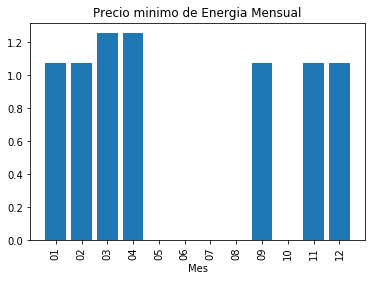

In [178]:
DatosPorMesMinimo = DataFrameSinRepetir.copy()
DatosPorMesMinimo['Fecha'] = pd.to_datetime(DatosPorMesMinimo['Fecha'])
DatosPorMesMinimo['Mes'] =  DatosPorMesMinimo[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesMinimo = DatosPorMesMinimo.groupby('Mes').agg({'Precio': np.min}) 
plt.bar(range(12), DatosPorMesMinimo['Precio'])
plt.xticks(range(12), (list(DatosPorMesMinimo.index)), rotation='vertical')
plt.title('Precio minimo de Energia Mensual')
plt.xlabel('Mes')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 0, 'Mes')

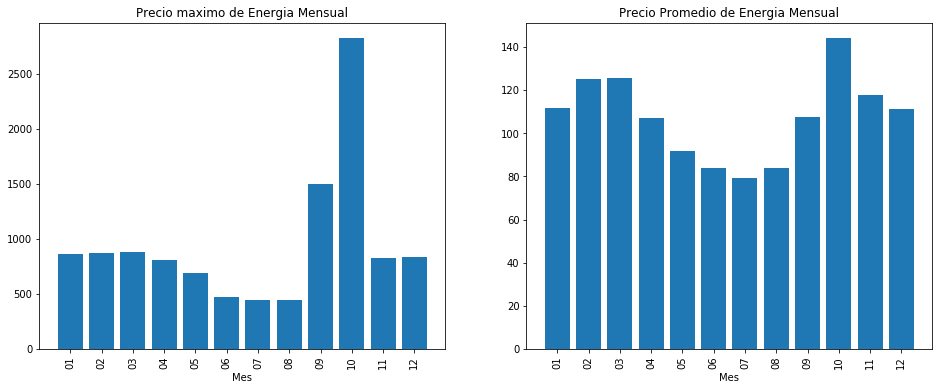

In [181]:
DatosPorMesPromedio = DataFrameSinRepetir.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio = DatosPorMesPromedio.groupby('Mes').agg({'Precio': np.mean}) 

plt.figure(figsize=(16, 6))
plt.subplot(1, 2 , 1)
plt.bar(range(12), DatosPorMes['Precio'])
plt.xticks(range(12), (list(DatosPorMesMaximo.index)), rotation='vertical')
plt.title('Precio maximo de Energia Mensual')
plt.xlabel('Mes')
plt.subplot(1, 2 , 2)
plt.bar(range(12), DatosPorMesPromedio['Precio'])
plt.xticks(range(12), (list(DatosPorMesPromedio.index)), rotation='vertical')
plt.title('Precio Promedio de Energia Mensual')
plt.xlabel('Mes')


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [229]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
ListaDeDiasHabiles = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
DataFramePorDiasLaborarles = DatosPorDia[(DatosPorDia['Dia'] == 'Monday') | (DatosPorDia['Dia'] == 'Tuesday')| (DatosPorDia['Dia'] == 'Wednesday')| (DatosPorDia['Dia'] == 'Thursday')| (DatosPorDia['Dia'] == 'Friday')]
DataFrameAgrupadoPorFecha = DataFramePorDiasLaborarles.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiasLaborarles, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')


Text(0, 0.5, 'Numero de ocurrencias')

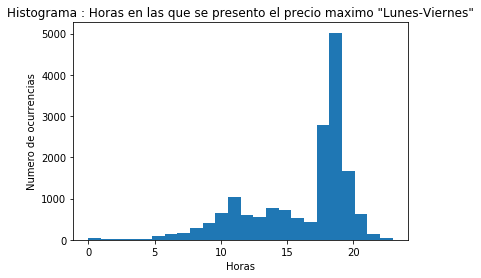

In [237]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio maximo "Lunes-Viernes"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [251]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaSabado = DatosPorDia[(DatosPorDia['Dia'] == 'Saturday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaSabado.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaSabado, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

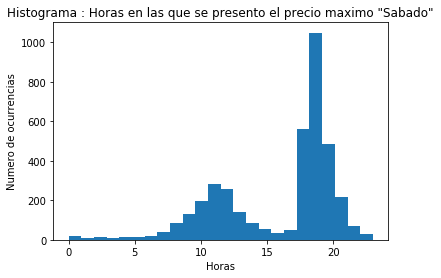

In [252]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio maximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [253]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaDomingo = DatosPorDia[(DatosPorDia['Dia'] == 'Sunday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaDomingo.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaDomingo, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

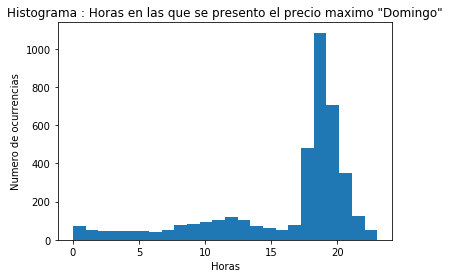

In [254]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio maximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [256]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Year'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DataFrameAgrupadoPorFecha = DatosPorDia.groupby('Year').agg({'Precio': np.min}) 
print(DataFrameAgrupadoPorFecha)

         Precio
Year           
1995   0.000000
1996   0.000000
1997  10.882310
1998  13.847330
1999  18.359530
2000  21.531167
2001  24.822879
2002  26.777682
2003  37.013438
2004  32.252998
2005  27.581415
2006  26.714797
2007  30.173824
2008  29.199135
2009  32.892503
2010  32.024957
2011  33.291100
2012  34.988099
2013  40.415346
2014  38.941951
2015  46.791501
2016  61.100689
2017  60.312095
2018  61.457224


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [285]:
DatosPorMesPromedio = DataFrameSinRepetir.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio['year'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DatosPorMesYear = DatosPorMesPromedio.groupby(['Mes','year']).agg({'Precio': np.mean}) 
DatosPorMesYear.reset_index(inplace=True)
DatosPorMesYear.columns = ['Mes','year','PromedioPorMes']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')

DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia = DatosPorDia.groupby('Fecha').agg({'Precio': np.mean}) 
DatosPorDia.reset_index(inplace=True)
DatosPorDia.columns = ['Fecha','PrecioPorDia']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')
DataFramesMerge = pd.merge(DataFramesMerge, DatosPorDia, on = ['Fecha'], how ='inner')
DataFrameHaGraficar = DataFramesMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 


<Figure size 1440x1440 with 0 Axes>

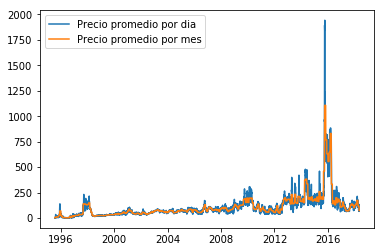

In [294]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PrecioPorDia'], label="Precio promedio por dia")
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PromedioPorMes'], label="Precio promedio por mes")
ax.legend()


---